<a href="https://colab.research.google.com/github/EldarsUP/Machine_1/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ Практика 2: Статистика в действии и её влияние на модель

## **Цель занятия:**
Изучить, как статистические метрики (среднее, медиана, квантили, размер выборки, стандартное отклонение) влияют на анализ данных и построение моделей машинного обучения. На практике мы проведем анализ целевой переменной **Y**, обучим модель линейной регрессии и исследуем влияние статистических характеристик на метрики модели.

## **Задание состоит из следующих частей:**
1. Анализ целевой переменной **Y** с точки зрения статистики. (в нашем случае - бинарная классификация)
2. Анализ пропусков
2. Изучение влияния статистических метрик на данные.
3. Обучение модели линейной регрессии и оценка ее точности.
4. Проведение теста Пирсона.
5. Визуализация результатов и анализ влияния статистики на метрики модели.
6. Валидация модели
---

## 1. Анализ целевой переменной Y с точки зрения статистики

### **Описание:**
В этом разделе вы проведете статистический анализ целевой переменной **Y**, изучите ее распределение и основные статистические характеристики.

1. **Импортируйте необходимые библиотеки:**

In [1]:
!pip install pandas scikit-learn seaborn scipy

In [2]:
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

2. **Загружаем набор данных:**

In [3]:
# Загрузка набора данных
df = pd.read_csv('/insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: age
колонка: sex
колонка: bmi
колонка: children
колонка: smoker
колонка: region
колонка: charges


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


3. **Проверьте наличие пропущенных значений и работа с пропусками для числовых:**

In [7]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [8]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'age'] = np.nan

In [9]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

age         5
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [10]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [11]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.age = df_median.age.fillna(df_median.age.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [12]:
# Вариант 3: Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.age = df_mean.age.fillna(df_median.age.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


⏰ Заполнение категориальных признаков происходит с помощью ```df.category_variable.mode() (как один из вариантов, хотя и считается недостаточно хорошим).```

Как вариант - можно использовать KNN (K-ближайших соедей)

4. **Выбираем целвую переменную**

⏰ В качестве целевой выбираем категориальную переменную, либо превращаем числовую в категориальное

```В моем датасете была выбрана целевая переменная old -> которая была преобразована из age (если возраст >= 35, то человек считается старым, иначе молодым)```

In [27]:
df['old'] = np.where(df['age'] >= 40, 1, 0).astype(int)

In [28]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'old'], dtype='object')

In [29]:
Y = df['old'] # выбираем целевую переменную (категориальную)
X = df.drop('old', axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('age', axis=1)

5. **Графический анализ**

In [30]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,bmi,children,charges
0,27.900,0,16884.92400
1,33.770,1,1725.55230
2,33.000,3,4449.46200
3,22.705,0,21984.47061
4,28.880,0,3866.85520
...,...,...,...
1333,30.970,3,10600.54830
1334,31.920,0,2205.98080
1335,36.850,0,1629.83350
1336,25.800,0,2007.94500


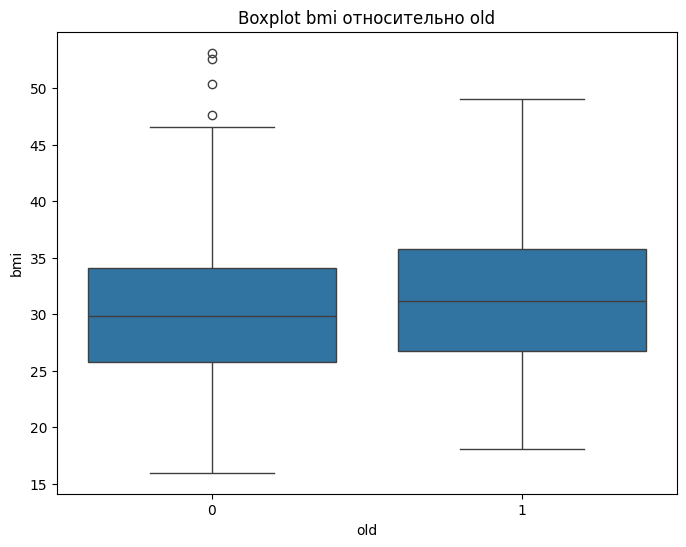

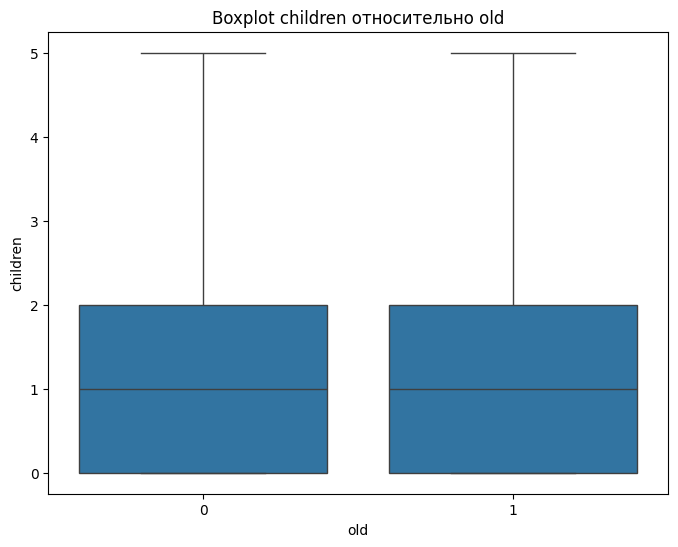

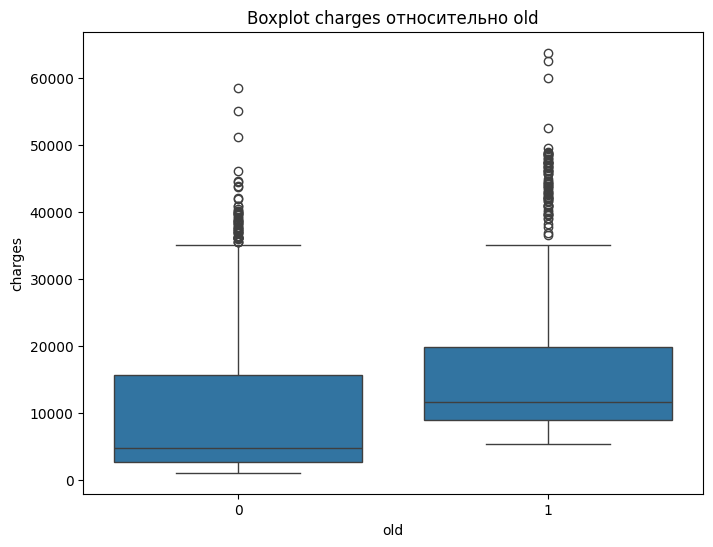

In [31]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='old', y=col, data=df)
    plt.title(f'Boxplot {col} относительно old')
    plt.show()

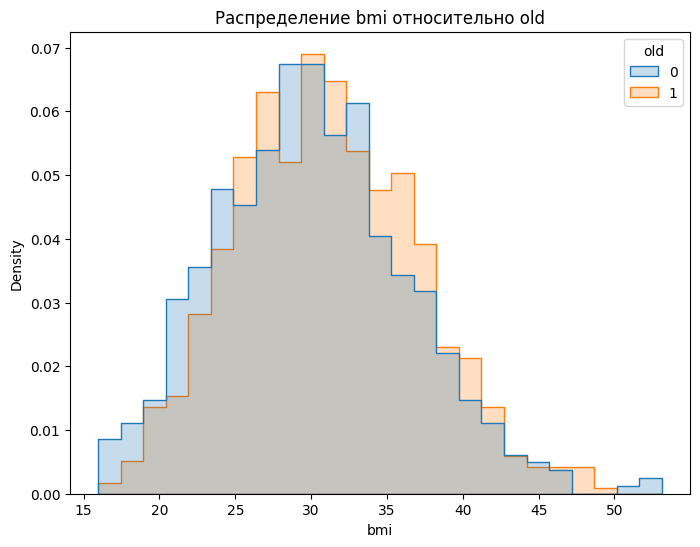

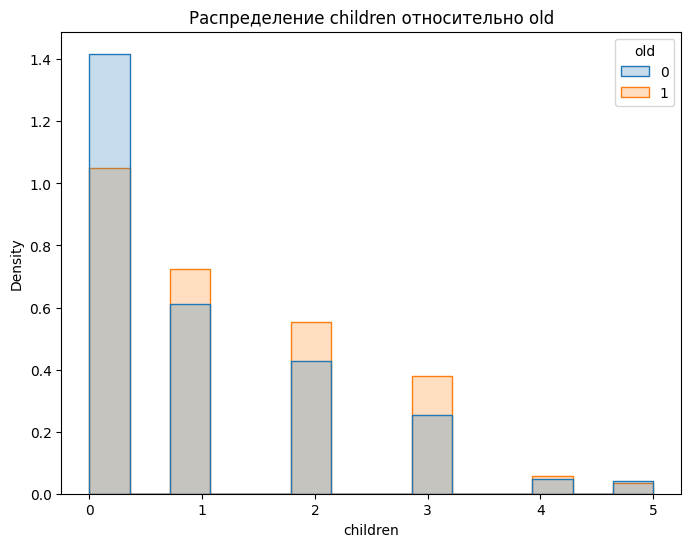

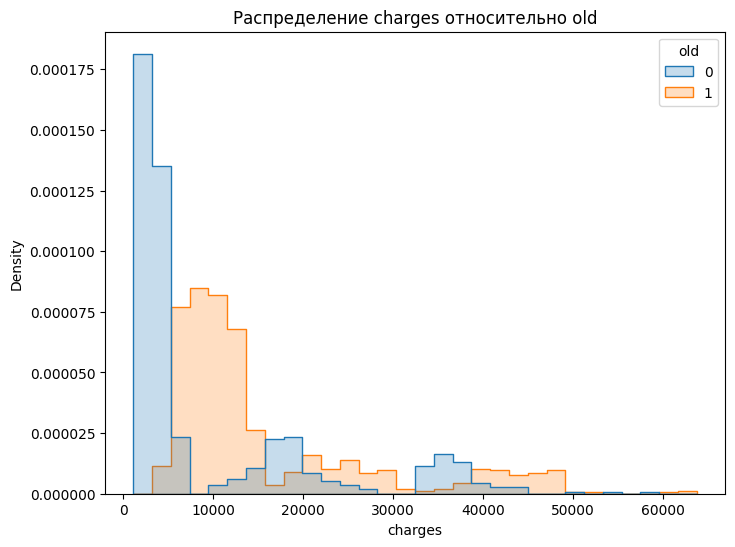

In [ ]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='old', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно old')
    plt.show()

Из графиков выше видно, что у old людей в среднем больше детей, выше индекс массы тела, а также они тратят больше денег на страховку, так как уже состоялись в жизни и могут себе позволить, а те кто не смог уже умерли и их нет в этой статистике

⏰ проанализировать график, выделить значимые признаки относительно Y

In [32]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('old')[df.select_dtypes(include=[np.number]).columns].describe()
desc_stats_numeric


age                                                       bmi  \
     count       mean       std   min   25%   50%   75%   max  count   
old                                                                    
0    674.0  27.048961  6.713118  18.0  21.0  27.0  33.0  39.0  674.0   
1    664.0  51.548193  7.037548  40.0  46.0  51.0  57.0  64.0  664.0   

                ...       charges                 old                      \
          mean  ...           75%          max  count mean  std  min  25%   
old             ...                                                         
0    30.074941  ...  15743.034337  58571.07448  674.0  0.0  0.0  0.0  0.0   
1    31.260715  ...  19839.727488  63770.42801  664.0  1.0  0.0  1.0  1.0   

                    
     50%  75%  max  
old                 
0    0.0  0.0  0.0  
1    1.0  1.0  1.0  

[2 rows x 40 columns]

In [33]:
# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('old')[df.select_dtypes(include=['object']).columns].describe()
desc_stats_categorical

sex                     smoker                 region                    \
    count unique     top freq  count unique top freq  count unique        top   
old                                                                             
0     674      2    male  346    674      2  no  530    674      4  southeast   
1     664      2  female  334    664      2  no  534    664      4  southeast   

          
    freq  
old       
0    184  
1    180

### Описание полученных результатов
⏰ ```Необходимо сделать подобное описание для своих переменных```

In [34]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('old')[col].describe())
    print("\n" + "="*50 + "\n")


Описательная статистика для bmi:

     count       mean       std    min       25%     50%       75%    max
old                                                                      
0    674.0  30.074941  6.243012  15.96  25.80000  29.805  34.10375  53.13
1    664.0  31.260715  5.892397  18.05  26.69875  31.160  35.72750  49.06


Описательная статистика для children:

     count      mean       std  min  25%  50%  75%  max
old                                                    
0    674.0  1.063798  1.228837  0.0  0.0  1.0  2.0  5.0
1    664.0  1.126506  1.181413  0.0  0.0  1.0  2.0  5.0


Описательная статистика для charges:

     count          mean           std        min          25%           50%  \
old                                                                            
0    674.0  10157.217581  11647.688388  1121.8739  2719.790013   4749.061450   
1    664.0  16430.512562  11754.526040  5415.6612  9033.060162  11657.916975   

              75%          max  
old        

In [35]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


sex                     smoker                 region                    \
    count unique     top freq  count unique top freq  count unique        top   
old                                                                             
0     674      2    male  346    674      2  no  530    674      4  southeast   
1     664      2  female  334    664      2  no  534    664      4  southeast   

          
    freq  
old       
0    184  
1    180

In [23]:
df

,age,sex,bmi,children,smoker,region,charges,old
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [41]:
184/674

0.27299703264094954

#### 1. **Sex**:
  - Пол человека
 - 2 уникальные категории , 50,3 частота женщин у old , 51,3 частота мужчин у not old(в дальнейшем young)

#### 2. **BMI**:
   - Индекс массы тела
  - средний для old - 31.26
  - средний для young - 30.07
  - разброс у old меньше 5,89 против 6,24

#### 3. **Children**:
  - Количество детей
   - У обоих категорий примерно одинаковое количество детей на всех процентилях.
   - Разброс у old чуть меньше, что логично, тк не все молодые отваживаются на семью .

#### 4. **Smoker**:
   - Курящий или нет
    - в обоих группах курящих меньшинство, но в old частота не курящих больше 80 против 78

#### 5. **Region**:
   - Регион проживания
    - 4 уникальных категории
    - в обоих наблюдаемых группах наиболее популярный регион Southwest
    - частота примерно одинаковая 27%

#### 6. **Charges**:
   - Траты на страховку(в год)
    - среднее для old 16430
    - среднее для young 10157
    - у young кардинально скачет количество затрат на страховку с 50% до 75% в 3 раза, а с 75 до максимума еще почти в 4 раза
    - у old скачек не такой большой с 50% до 75% в 1,8 раз и с 75% до максимума еще в 3 раза



### Вывод:
На основе представленных данных можно сделать выводы о ключевых характеристиках, которые определяются возрастной группой. В частности:
- Более старые люди имеют в среднем больший индекс массы тела
- Также они имеют в среднем больше детей и только малая их часть детей вообще не имеет
- В данной выборке не смотря на возраст примерно равные распределения по регионам, что подразумевает что это было сделано специально
- И самое важное, что у молодых людей гораздо меньше свободных денег, и вдобавок они не чувтсвуют нужду в страховке, поэтому у них в среднем гораздо меньше затрат на неё

## 2. Расчет теста Пирсона

### **Описание:**
Вы рассчитаете коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.

### **Шаги:**

1. **Рассчитайте коэффициенты корреляции Пирсона для каждого признака:**

In [42]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,age,bmi,children,charges,old
age,1.000000,0.109272,0.042469,0.299008,0.872163
bmi,0.109272,1.000000,0.012759,0.198341,0.097257
children,0.042469,0.012759,1.000000,0.067998,0.026018
charges,0.299008,0.198341,0.067998,1.000000,0.259102
old,0.872163,0.097257,0.026018,0.259102,1.000000


2. ⏰ **Интерпретируйте результаты:**


### Интерпретация:
- **Коэффициент корреляции Пирсона** показывает степень линейной связи между двумя переменными.
- **age и old 0.872163**
 - большая корреляция, так как old основан на age
- **age и charges 0.299008**
 - корреляция связана с тем, что тем больше возраст, тем больше свободных денег, но в связи с тем, что в выборке нет людей вообще без страховочных денег, оно не сильно коррелирует, потому что молодые и богатые тоже существуют и в наше время в большом количестве
- **bmi и charges 0.198341**
 - корреляция есть, так как в среднем люди с лишним весом более боятся за обстоятельства и имеют проблемы со здоровьем, но так как в настоящее время есть множество обязательных страховок корреляция не большая, так как люди даже здоровые и не в группах риска не любят рисковать

### Описание корреляций для значимых признаков:


### Почему мультиколлинеарность это плохо?

Мультиколлинеарность возникает, когда два или более независимых признака сильно коррелируют друг с другом. Это приводит к нескольким проблемам:

1. **Переоценка значимости признаков**:
   - Когда признаки сильно коррелированы, модель может "перепутать" влияние каждого из них на целевую переменную, что приведет к ненадежным коэффициентам. Это затрудняет интерпретацию модели, поскольку сложно понять, какой из признаков действительно важен.

2. **Нестабильность модели**:
   - При наличии мультиколлинеарности небольшие изменения в данных могут привести к большим изменениям в коэффициентах модели. Это делает модель нестабильной и менее устойчивой.

3. **Затруднение выбора значимых признаков**:
   - Модель может затрудняться при выделении важности отдельных признаков, если они сильно связаны друг с другом. Это может усложнить процесс отбора признаков и снизить точность модели.

4. **Увеличение дисперсии коэффициентов**:
   - Мультиколлинеарность увеличивает дисперсию оценок коэффициентов регрессии, что делает их менее надежными. В результате, некоторые признаки могут казаться незначимыми, хотя на самом деле они играют важную роль.

## 3. Немного машинного обучения

- отберем признаки (числовые и категориальные отдельно)
- обработаем числовые и категориальыне
- обучим модель
- узнаем что влияет на Y

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [44]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Категориальные признаки:", categorical_features)


Категориальные признаки: ['sex', 'smoker', 'region']


In [45]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [46]:
X_processed

,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,27.900,0,16884.92400,False,True,False,False,True
1,33.770,1,1725.55230,True,False,False,True,False
2,33.000,3,4449.46200,True,False,False,True,False
3,22.705,0,21984.47061,True,False,True,False,False
4,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,30.970,3,10600.54830,True,False,True,False,False
1334,31.920,0,2205.98080,False,False,False,False,False
1335,36.850,0,1629.83350,False,False,False,True,False
1336,25.800,0,2007.94500,False,False,False,False,True


In [48]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64','int64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['bmi', 'children', 'charges']


In [49]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [50]:
X_processed

,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.321227,0.0,0.251611,False,True,False,False,True
1,0.479150,0.2,0.009636,True,False,False,True,False
2,0.458434,0.6,0.053115,True,False,False,True,False
3,0.181464,0.0,0.333010,True,False,True,False,False
4,0.347592,0.0,0.043816,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,0.403820,0.6,0.151299,True,False,True,False,False
1334,0.429379,0.0,0.017305,False,False,False,False,False
1335,0.562012,0.0,0.008108,False,False,False,True,False
1336,0.264730,0.0,0.014144,False,False,False,False,True


### Шаг 3: Объяснение логистической регрессии


Логистическая регрессия — это статистический метод для анализа набора данных, в котором одна или более независимых переменных определяют исход (зависимую переменную), которая является бинарной (т.е. принимает только два возможных значения, например, 0 и 1). Целью логистической регрессии является нахождение наилучшей модели, описывающей связь между независимыми переменными и вероятностью определенного исхода.

Основные характеристики:

Функция логита (логистическая функция): Используется для моделирования вероятности принадлежности наблюдения к определенному классу.
Выводы о влиянии признаков: Коэффициенты модели показывают, как изменение признака влияет на логарифм отношения шансов.

**Функция для обучения и оценки модели**

In [51]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [52]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.7776
Точность на тестовой выборке: 0.7761

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       135
           1       0.81      0.72      0.76       133

    accuracy                           0.78       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.78      0.78      0.78       268



**Пояснение:**

- Точность (Accuracy): Доля правильных предсказаний от общего числа предсказаний.
- Precision (Точность): Доля правильных положительных предсказаний среди всех положительных предсказаний.
- Recall (Полнота): Доля правильно предсказанных положительных случаев среди всех реальных положительных случаев.
- F1-score: Гармоническое среднее между точностью и полнотой.

In [53]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


            Feature  Coefficient
2           charges     6.633935
4        smoker_yes    -2.612093
1          children    -0.179050
3          sex_male    -0.119086
6  region_southeast    -0.106051
0               bmi     0.048816
7  region_southwest    -0.010237
5  region_northwest     0.005830


**Пояснение:**

- Коэффициенты показывают влияние признака на вероятность принадлежности к классу 1 (пожилые люди).
- Положительный коэффициент: Увеличение признака повышает вероятность принадлежности к классу 1.
- Отрицательный коэффициент: Увеличение признака снижает вероятность принадлежности к классу 1.

## 4. Построение модели логистической регрессии для предсказания качества вина

- **Модель логистической регрессии успешно обучена для предсказания пожилых людей.**
- **Точность на обучающей и тестовой выборках средняя, что указывает на способность модели обобщать данные , но все же совершать ошибки из за не очень хороших данных.**
- **Анализ коэффициентов показал, какие признаки наиболее влияют на качество вина:**
  - **Количество трат на страховку положительно влияет на качество.**
  - **Курящие люди отрицательно влияют на качество**
- **Преобразование категориальных признаков и нормализация числовых признаков улучшили качество модели и упростили интерпретацию результатов.**


### 4.1 Кросс-валидация модели

In [54]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.7728
Отклонение точности: 0.0262


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

### 4.2 Построение ROC-кривой

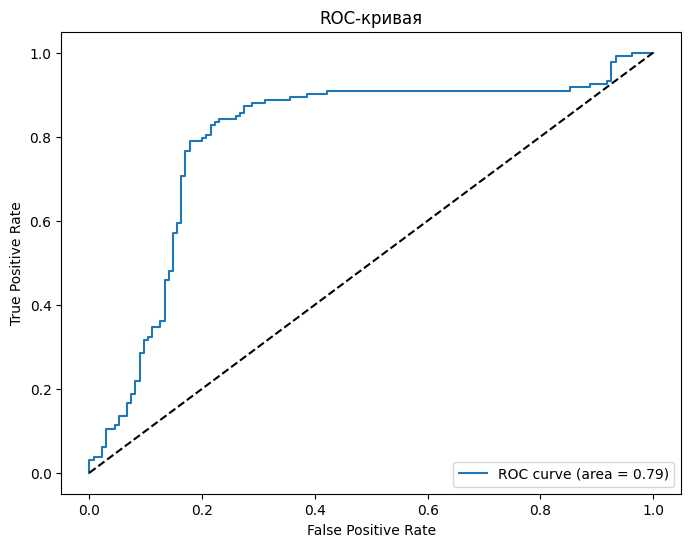

In [56]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

## Заключение

Мы успешно построили модель логистической регрессии для предсказания лучших вин на основе химических характеристик. Преобразование данных и анализ коэффициентов модели позволили нам понять влияние различных признаков на качество вина.


---

# Примечания

- **Логистическая регрессия** является мощным инструментом для бинарной классификации и позволяет интерпретировать результаты через коэффициенты модели.
- **Преобразование категориальных признаков** (One-Hot Encoding) и **нормализация числовых признаков** являются стандартными шагами предобработки данных для многих алгоритмов машинного обучения.
- **Анализ коэффициентов модели** помогает понять, какие признаки наиболее значимы и как они влияют на предсказания.

---

# Дополнительная литература

- **Логистическая регрессия:**
  - [Документация scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- **Предобработка данных:**
  - [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
  - [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- **Метрики качества модели:**
  - [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
  - [ROC-кривая и AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

---